In [1]:
import ganja.io as io
import ganja.preprocessing as preprocessing
import ganja.utils as utils

Welcome to ROOTaaS 6.06/05


In [2]:
reload(io)
reload(preprocessing)

# import ROOT as RT

from glob import glob

class Parameters(utils.Parameters):
    base = utils.param('/mnt/t3nfs01/data01/shome/pandolf/CMSSW_5_3_32_Ganja/src/Ganja/GanjaTree/test')
    prod = utils.param('prod_oct25_v0')
    folder = utils.param('QCD_Pt_80to120')
    
    inpfiles = utils.param('output/ganjaTree_[0123].root')
    ijob = utils.param(0)
    outdir = utils.param('.')

class MyApp(utils.MyApp):
    classes = utils.List([Parameters])

# Read all parameters above from command line. 
# Note: names are all converted to be all capital
notebook_parameters = Parameters(MyApp()).get_params()

notebook_parameters['BASE'] += '/'+notebook_parameters['PROD']

# copy parameters to global scope
globals().update(notebook_parameters)

notebook_parameters

{'BASE': u'/mnt/t3nfs01/data01/shome/pandolf/CMSSW_5_3_32_Ganja/src/Ganja/GanjaTree/test/prod_oct25_v0',
 'FOLDER': u'QCD_Pt_80to120',
 'IJOB': 0,
 'INPFILES': u'output/ganjaTree_[0123].root',
 'OUTDIR': u'.',
 'PROD': u'prod_oct25_v0'}

In [3]:
fnames = glob(BASE+'/'+FOLDER+'/'+INPFILES)

#arr,gen,reco 
%time df,gen,reco = io.read_root(fnames,'ganja/ganjaTree',rebin_as=(24,24,1),post_process=preprocessing.rescale_by_pt)

CPU times: user 2min 49s, sys: 31.8 s, total: 3min 21s
Wall time: 3min 34s


In [4]:
# import gc
# gc.collect()

In [5]:
# reload(utils)

nevents = utils.read_nevents(fnames,BASE,'data/%s.json' % PROD)
njets = gen.shape[0]

print(nevents,njets,float(njets)/nevents)

(139377, 278753, 1.9999928252150643)


In [6]:
df.describe()

,eta,etaGen,nPU,phi,phiGen,pt,ptGen,rho
count,278753.000000,278753.000000,278753.000000,278753.000000,278753.000000,278753.000000,278753.000000,278753.000000
mean,0.001560,0.001717,8.760587,-0.006375,-0.006193,84.136650,85.264732,5.423602
std,1.546206,1.547175,4.434288,1.813907,1.813920,21.921953,20.877436,2.972960
min,-4.501621,-4.513649,0.000000,-3.141585,-3.141544,3.125484,7.847940,0.000000
25%,-1.136170,-1.137650,5.000000,-1.585405,-1.584073,69.903244,72.567772,3.201449
50%,-0.000952,-0.000904,8.000000,-0.004899,-0.004641,83.406845,84.642487,4.944962
75%,1.139770,1.142160,12.000000,1.558699,1.560490,97.362846,97.480988,7.141886
max,4.500745,4.563290,37.000000,3.141581,3.141551,252.922119,272.560791,24.457174


In [7]:
def show(img,gen,reco,df):
    row = df.loc[img]
    # print(row)
    plt.figure(figsize=(15,3.5))
    plt.subplot(131)
    plt.title("gen (pt,eta) = (%1.2g,%1.2g)" % (row.ptGen,row.etaGen) )
    plt.xlabel('$\Delta \eta$')
    plt.ylabel('$\Delta \phi$')    
    plt.imshow(gen[img,:,:,0],cmap='Reds')
    plt.colorbar()
    plt.subplot(132)
    plt.title("reco (pt,eta) = (%1.2g,%1.2g)" % (row.pt,row.eta) )
    plt.xlabel('$\Delta \eta$')
    plt.ylabel('$\Delta \phi$')    
    plt.imshow(reco[img,:,:,0],cmap='Reds')
    plt.colorbar()
    plt.subplot(133)
    plt.title("reco-true (GeV/area)" )
    plt.xlabel('$\Delta \eta$')
    plt.ylabel('$\Delta \phi$')    
    plt.imshow( (reco[img,:,:,0]-gen[img,:,:,0])*row.ptGen,vmin=-5,vmax=5)
    plt.colorbar()
    plt.show()

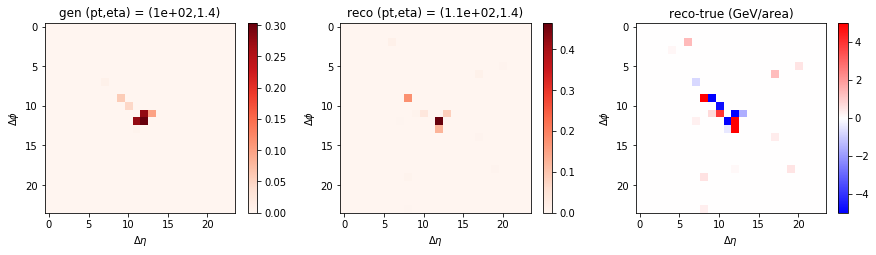

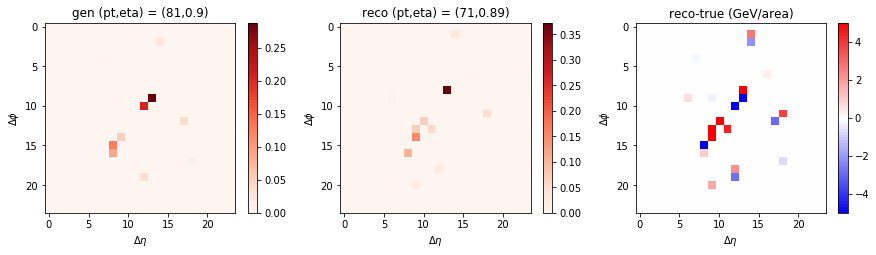

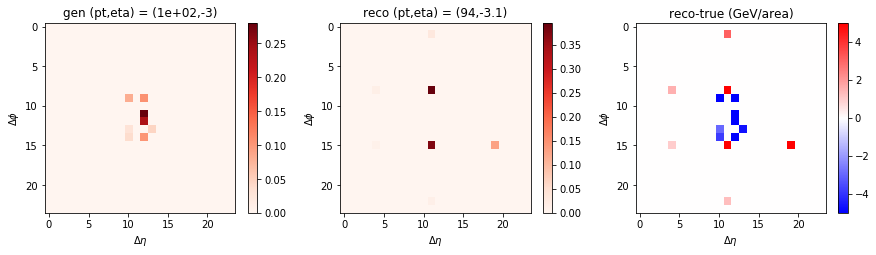

In [8]:
random_images = np.random.choice(df.index.values, 3)

for img in random_images:
    show(img,gen,reco,df)

In [9]:
import os
# reload(io)

outdir = OUTDIR+'/'+PROD
if not os.path.exists(outdir):
    os.mkdir(outdir)

io.write_out(outdir,FOLDER,IJOB,{'fnames' : fnames, 'nevents' : nevents}, df, gen, reco)

In [10]:
# del df
# del gen
# del reco
# # gc.collect()

In [11]:
# gc.collect()